In [40]:
import pandas as pd
import numpy as np
import glob
from PIL import Image 
import random
import matplotlib.pyplot as plt

### Original Training and Validation Data 

In [66]:
original_output = glob.glob("./out_out/*.txt")
len(original_output)

1233

In [37]:
original_actual = []

for i in original_output:
    original_actual.append(i.replace('out_out','data/customdata/labels').replace('.jpg',''))

In [39]:
### Checking accuracy of classification 
for i in range(len(original_output)):
    output = []
    actual = []
    
    with open(original_output[i],'r') as f:
        lines_out = f.readlines()
        for j in lines_out:
            output.append(j.split()[4])
    
    with open(original_actual[i],'r') as f:
        lines_act = f.readlines()
        for k in lines_act:
            actual.append(k.split()[0])
            
    if output != actual:
        print(i)

In [42]:
### Summarising confidence of classification

confidence_scores = []

for i in original_output:
    with open(i,'r') as f:
        lines = f.readlines()
        for j in lines:
            confidence_scores.append(j.split()[5])    

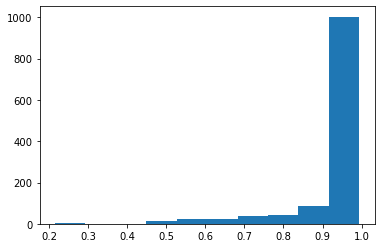

In [65]:
conf_ser = pd.Series(confidence_scores, dtype = 'float')

plt.hist(conf_ser, bins =10)
plt.show()

### White_grunt Run

In [80]:
grunt_output = glob.glob("./out_1/*.txt")
len(grunt_output)

184

In [81]:
### Summarising confidence of classification

confidence_scores1 = []
classificaton1 = []

for i in grunt_output:
    with open(i,'r') as f:
        lines = f.readlines()
        for j in lines:
            classificaton1.append(j.split()[4])
            confidence_scores1.append(j.split()[5])    

In [82]:
conf_ser1 = pd.Series(confidence_scores1, dtype = 'float')
class1 = pd.Series(classificaton1, dtype = 'int')

/Users/abhirajvinnakota/opt/miniconda3/envs/geospatial/lib/python3.9/site-packages/numpy/core/numeric.py:2378: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


(array([ 3.,  0.,  1.,  4.,  2.,  4.,  5.,  8.,  9., 60.]),
 array([0.282594 , 0.3530196, 0.4234452, 0.4938708, 0.5642964, 0.634722 ,
        0.7051476, 0.7755732, 0.8459988, 0.9164244, 0.98685  ]),
 <BarContainer object of 10 artists>)

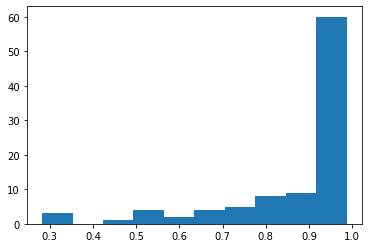

In [83]:
plt.hist(conf_ser1[class1 ==1], bins = 10)

(array([ 1.,  0.,  2.,  2.,  3.,  8.,  2.,  3.,  9., 63.]),
 array([0.332604, 0.398237, 0.46387 , 0.529503, 0.595136, 0.660769,
        0.726402, 0.792035, 0.857668, 0.923301, 0.988934]),
 <BarContainer object of 10 artists>)

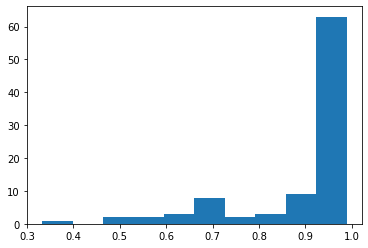

In [84]:
plt.hist(conf_ser1[class1 ==0], bins = 10)

In [86]:
len(conf_ser1[class1 ==0])

93

In [87]:
len(conf_ser1[class1 ==1])

96

In [94]:
!ls data/customdata/00_original_labels/

labels_lane                 lane_snapper_pics.txt
labels_whitegrunt           white_grunt_pics.txt
labels_yellowtail           yellowtail_snapper_pics.txt


## Making labels

In [96]:
labels_lane = glob.glob("./data/customdata/00_original_labels/labels_lane/*.txt")
labels_whitegrunt = glob.glob("./data/customdata/00_original_labels/labels_whitegrunt/*.txt")
labels_yellowtail = glob.glob("./data/customdata/00_original_labels/labels_yellowtail/*.txt")

print(len(labels_lane))
print(len(labels_whitegrunt))
print(len(labels_yellowtail))

776
182
457


In [98]:
# For 01_run_lane

final = '01_run_lane/labels'

for i in labels_lane:
    dest = i.replace('00_original_labels/labels_lane', final)
    with open(i,'r') as f:
        old_line = f.read()
        out_file = open(dest,'x')
        out_file.write('0 '+ old_line[2:])
        out_file.close()

empty_labels = {'00_original_labels/labels_whitegrunt' : labels_whitegrunt, 
                 '00_original_labels/labels_yellowtail' : labels_yellowtail}

for a, b in empty_labels.items():
    for i in b:
        dest = i.replace(a, final)
        out_file = open(dest,'x')
        out_file.close()

In [99]:
labels = glob.glob("./data/customdata/01_run_lane/labels/*.txt")
print(len(labels))

1415


In [101]:
# For 01_run_yellowtail

final = '01_run_yellowtail/labels'

for i in labels_yellowtail:
    dest = i.replace('00_original_labels/labels_yellowtail', final)
    with open(i,'r') as f:
        old_line = f.read()
        out_file = open(dest,'x')
        out_file.write('0 '+ old_line[2:])
        out_file.close()

empty_labels = {'00_original_labels/labels_whitegrunt' : labels_whitegrunt, 
                 '00_original_labels/labels_lane' : labels_lane}

for a, b in empty_labels.items():
    for i in b:
        dest = i.replace(a, final)
        out_file = open(dest,'x')
        out_file.close()

In [179]:
labels = glob.glob("./data/customdata/labels/*.txt")
print(len(labels))

1401


## Creating Train (70), Valid(20) and Detect datasets(10)


In [165]:
lane_pics = []
whitegrunt_pics = []
yellowtail_pics = []

pic_dict = {"data/customdata/00_original_labels/lane_snapper_pics.txt": lane_pics,
            "data/customdata/00_original_labels/white_grunt_pics.txt" : whitegrunt_pics,
            "data/customdata/00_original_labels/yellowtail_snapper_pics.txt" : yellowtail_pics }

for i , j in pic_dict.items():
    with open(i,'r') as f:
        j.extend(f.readlines())

In [166]:
pic_dict["data/customdata/00_original_labels/lane_snapper_pics.txt"][0] #[:-1]

'./data/customdata/images/Unassisted_CatLanding_20180830_BZ033.jpg\n'

In [167]:
print(len(pic_dict["data/customdata/00_original_labels/lane_snapper_pics.txt"]))
print(len(pic_dict["data/customdata/00_original_labels/white_grunt_pics.txt"]))
print(len(pic_dict["data/customdata/00_original_labels/yellowtail_snapper_pics.txt"]))

print(len(pic_dict["data/customdata/00_original_labels/lane_snapper_pics.txt"]) *0.7)
print(len(pic_dict["data/customdata/00_original_labels/white_grunt_pics.txt"])*0.7)
print(len(pic_dict["data/customdata/00_original_labels/yellowtail_snapper_pics.txt"])*0.7)

print(len(pic_dict["data/customdata/00_original_labels/lane_snapper_pics.txt"]) *0.2)
print(len(pic_dict["data/customdata/00_original_labels/white_grunt_pics.txt"])*0.2)
print(len(pic_dict["data/customdata/00_original_labels/yellowtail_snapper_pics.txt"])*0.2)

print(len(pic_dict["data/customdata/00_original_labels/lane_snapper_pics.txt"]) *0.1)
print(len(pic_dict["data/customdata/00_original_labels/white_grunt_pics.txt"])*0.1)
print(len(pic_dict["data/customdata/00_original_labels/yellowtail_snapper_pics.txt"])*0.1)

776
182
457
543.1999999999999
127.39999999999999
319.9
155.20000000000002
36.4
91.4
77.60000000000001
18.2
45.7


In [168]:
def Diff(li1, li2):
    return (list(list(set(li1)-set(li2)) + list(set(li2)-set(li1))))

In [169]:
train = []
valid = []
detect = []

datasets = { (543,127,320) : train,
             (155,36,91) : valid }
#             (543,123,319) : detect }

for sample, dataset in datasets.items():
        
    sample_lane = random.sample(lane_pics ,sample[0])
    sample_whitegrunt = random.sample(whitegrunt_pics,sample[1])
    sample_yellowtail = random.sample(yellowtail_pics,sample[2])
    #print(len(sample_lane))
    #print(len(sample_whitegrunt))
    #print(len(sample_yellowtail))

    
    for i in [sample_lane,sample_whitegrunt,sample_yellowtail]:
        dataset.extend(i)
        pass
    
    lane_pics = Diff(lane_pics, sample_lane)
    whitegrunt_pics = Diff(whitegrunt_pics, sample_whitegrunt)
    yellowtail_pics = Diff(yellowtail_pics, sample_yellowtail)
    print(len(lane_pics))
    print(len(whitegrunt_pics))
    print(len(yellowtail_pics))
    pass

print(len(lane_pics))
print(len(whitegrunt_pics))
print(len(yellowtail_pics))

for i in [lane_pics,whitegrunt_pics,yellowtail_pics]:
    detect.extend(i)



233
55
137
78
19
46
78
19
46


In [170]:
print(len(train))
print(len(valid))
print(len(detect))

990
282
143


In [175]:
abc = {'train_data.txt': train, 'valid_data.txt' : valid, 'detect_data.txt': detect}

for i in ['./data/customdata/01_run_yellowtail/','./data/customdata/01_run_lane/']:
    for a,b in abc.items() :
        with open(f"{i}{a}", 'x') as f: #"./data/customdata/train_data.txt", 'x') as f:
            for line in b:
                f.write(f'{line[:-1]}\n')  
            f.close()

## Make the custom data file 

In [176]:
folders = ["01_run_lane", "01_run_yellowtail"] 

for i in folders:
    with open(f"./data/customdata/{i}/custom.data", 'x') as f:
        f.write('classes=1\n') 
        f.write(f'train=data/customdata/{i}/train_data.txt\n')  
        f.write(f'valid=data/customdata/{i}/valid_data.txt\n')  
        f.write(f'names=data/customdata/{i}/custom.names\n')  
        f.close()

## Make the custom names file

In [178]:
folders = ["lane", "yellowtail"] 

for i in folders:
    with open(f"./data/customdata/01_run_{i}/custom.names", 'x') as f:
        f.write(f"{i}_snapper")
        f.close()

##### Edit the train.py file for last.ot and best.pt!!!

##### Edit config file for classes and filters

###### Edit the commands the in colab file that is used to run

-
-
-